# To Check the codes for Milestone 2, please scroll down untill you find the heading for 'FRA Milestone 2'. 

# Company Default Data

* Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interests on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.

* A balance sheet is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.

* Data that is available includes information from the financial statement of the companies for the previous year (2015). Also, information about the Networth of the company in the following year (2016) is provided which can be used to drive the labeled field.

In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")


Let us now go ahead and read the dataset and check the first five rows of the dataset.

#### Importing the dataset

In [2]:
pd.set_option('display.max_rows', None) 

In [3]:
Company = pd.read_excel("D:\\Study\Data Science and Machine Learning\\Great_learning course\\Main content\\Module11 -  Finance and Risk Analytics\\Project Milestone 1\\Company_Data2015-1.xlsx")

#Glimpse of Data
Company.head()

Co_Code          Co_Name  Networth Next Year  Equity Paid Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital Employed  Total Debt  Gross Block   Net Working Capital   \
0          -1007.24     5936.03        474.30              -1076.34   
1           4458.20     7410.18       9070.86              -1098.88   
2           7714.68     6944.54       1281.54               4496.25   
3           2353.88     2326.05       1033.69              -2612.42   
4           4675.33     5740.90       1084.20               1836.23   

   Current Assets   ...  PBIDTM (%)[Latest]  PBITM (%)[Latest]  \
0            40.50  ...                0.00               0.00   
1           486.86  ...              -10.30             -39.74   
2          9097.64  ...            -5279.14           -5516.98   
3          1034.12  ...               -3.33              -7.21   
4          4685.81  ...             -295.55            -400.55   

   PBDTM (%)[Latest]  CPM (%)[Latest]  APATM (%)[Latest]  \
0               0.00             0.00               0.00   
1             -57.74           -57.74             -87.18   
2           -7780.25         -7723.67           -7961.51   
3             -48.13           -47.70             -51.58   
4            -845.88           379.79             274.79   

   Debtors Velocity (Days)  Creditors Velocity (Days)  \
0                        0                          0   
1                       29                        101   
2                       97                        558   
3                       93                         63   
4                     3887                        346   

   Inventory Velocity (Days)  Value of Output/Total Assets  \
0                       45.0                          0.00   
1                        2.0                          0.31   
2                        0.0                         -0.03   
3                        2.0                          0.24   
4                        0.0                          0.01   

   Value of Output/Gross Block  
0                         0.00  
1                         0.24  
2                        -0.26  
3                         1.90  
4                         0.05  

[5 rows x 67 columns]

#### Fixing messy column names (containing spaces) for ease of use

In [4]:
Company.columns = Company.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_')

#### Checking top 5 rows again

In [5]:
Company.head()

Co_Code          Co_Name  Networth_Next_Year  Equity_Paid_Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital_Employed  Total_Debt  Gross_Block_  Net_Working_Capital_  \
0          -1007.24     5936.03        474.30              -1076.34   
1           4458.20     7410.18       9070.86              -1098.88   
2           7714.68     6944.54       1281.54               4496.25   
3           2353.88     2326.05       1033.69              -2612.42   
4           4675.33     5740.90       1084.20               1836.23   

   Current_Assets_  ...  PBIDTM_perc[Latest]  PBITM_perc[Latest]  \
0            40.50  ...                 0.00                0.00   
1           486.86  ...               -10.30              -39.74   
2          9097.64  ...             -5279.14            -5516.98   
3          1034.12  ...                -3.33               -7.21   
4          4685.81  ...              -295.55             -400.55   

   PBDTM_perc[Latest]  CPM_perc[Latest]  APATM_perc[Latest]  \
0                0.00              0.00                0.00   
1              -57.74            -57.74              -87.18   
2            -7780.25          -7723.67            -7961.51   
3              -48.13            -47.70              -51.58   
4             -845.88            379.79              274.79   

   Debtors_Velocity_Days  Creditors_Velocity_Days  Inventory_Velocity_Days  \
0                      0                        0                     45.0   
1                     29                      101                      2.0   
2                     97                      558                      0.0   
3                     93                       63                      2.0   
4                   3887                      346                      0.0   

   Value_of_Output_to_Total_Assets  Value_of_Output_to_Gross_Block  
0                             0.00                            0.00  
1                             0.31                            0.24  
2                            -0.03                           -0.26  
3                             0.24                            1.90  
4                             0.01                            0.05  

[5 rows x 67 columns]

#### Now, let us check the number of rows (observations) and the number of columns (variables)

In [6]:
print('The number of rows (observations) is',Company.shape[0],'\n''The number of columns (variables) is',Company.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


#### Checking datatype of all columns

In [7]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block_                         3586 non-null   float64
 8   Net_Working_Capital_                 3586 non-null   float64
 9   Current_Assets_                      3586 non-null   float64
 10  Current_Liabilities_and_Provisions_  3586 non-null   float64
 11  Total_Assets_to_Liabilities_  

In [8]:
Company.drop('Co_Code', axis = 1, inplace = True)

In [9]:
Company.drop('Co_Name', axis = 1, inplace = True)

In [10]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 65 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Networth_Next_Year                   3586 non-null   float64
 1   Equity_Paid_Up                       3586 non-null   float64
 2   Networth                             3586 non-null   float64
 3   Capital_Employed                     3586 non-null   float64
 4   Total_Debt                           3586 non-null   float64
 5   Gross_Block_                         3586 non-null   float64
 6   Net_Working_Capital_                 3586 non-null   float64
 7   Current_Assets_                      3586 non-null   float64
 8   Current_Liabilities_and_Provisions_  3586 non-null   float64
 9   Total_Assets_to_Liabilities_         3586 non-null   float64
 10  Gross_Sales                          3586 non-null   float64
 11  Net_Sales                     

#### Now, let us check the basic measures of descriptive statistics for the continuous variables

In [11]:
Company.describe()

Networth_Next_Year  Equity_Paid_Up      Networth  Capital_Employed  \
count         3586.000000     3586.000000   3586.000000       3586.000000   
mean           725.045251       62.966584    649.746299       2799.611054   
std           4769.681004      778.761744   4091.988792      26975.135385   
min          -8021.600000        0.000000  -7027.480000      -1824.750000   
25%              3.985000        3.750000      3.892500          7.602500   
50%             19.015000        8.290000     18.580000         39.090000   
75%            123.802500       19.517500    117.297500        226.605000   
max         111729.100000    42263.460000  81657.350000     714001.250000   

          Total_Debt   Gross_Block_  Net_Working_Capital_  Current_Assets_  \
count    3586.000000    3586.000000           3586.000000      3586.000000   
mean     1994.823779     594.178829            410.809665      1960.349172   
std     23652.842746    4871.547802           6301.218546     22577.570829   
min        -0.720000     -41.190000         -13162.420000        -0.910000   
25%         0.030000       0.570000              0.942500         4.000000   
50%         7.490000      15.870000             10.145000        24.540000   
75%        72.350000     131.895000             61.175000       135.277500   
max    652823.810000  128477.590000         223257.560000    721166.000000   

       Current_Liabilities_and_Provisions_  Total_Assets_to_Liabilities_  ...  \
count                          3586.000000                   3586.000000  ...   
mean                            391.992078                   1778.453751  ...   
std                            2675.001631                  11437.574690  ...   
min                              -0.230000                     -4.510000  ...   
25%                               0.732500                     10.555000  ...   
50%                               9.225000                     52.010000  ...   
75%                              65.650000                    310.540000  ...   
max                           83232.980000                 254737.220000  ...   

       PBIDTM_perc[Latest]  PBITM_perc[Latest]  PBDTM_perc[Latest]  \
count          3585.000000         3585.000000         3585.000000   
mean            -51.162890         -109.213414         -311.570357   
std            1795.131025         3057.635870        10921.592639   
min          -78870.450000      -141600.000000      -590500.000000   
25%               0.000000            0.000000            0.000000   
50%               8.070000            5.230000            4.690000   
75%              18.990000           14.290000           14.110000   
max           19233.330000        19195.700000        15640.000000   

       CPM_perc[Latest]  APATM_perc[Latest]  Debtors_Velocity_Days  \
count       3585.000000         3585.000000            3586.000000   
mean        -307.005632         -365.056187             603.894032   
std        10676.149629        12500.051387           10636.759580   
min      -572000.000000      -688600.000000               0.000000   
25%            0.000000            0.000000               8.000000   
50%            3.890000            1.590000              49.000000   
75%           11.390000            7.410000             106.000000   
max        15640.000000        15266.670000          514721.000000   

       Creditors_Velocity_Days  Inventory_Velocity_Days  \
count             3.586000e+03              3483.000000   
mean              2.057855e+03                79.644559   
std               5.416948e+04               137.847792   
min               0.000000e+00              -199.000000   
25%               8.000000e+00                 0.000000   
50%               3.900000e+01                35.000000   
75%               8.900000e+01                96.000000   
max               2.034145e+06               996.000000   

       Value_of_Output_to_Total_Assets  Value_of_Output_to_Gross_Block  
count        

In [12]:
pd.options.display.float_format = '{:.2f}'.format   

Company.describe()

Networth_Next_Year  Equity_Paid_Up  Networth  Capital_Employed  \
count             3586.00         3586.00   3586.00           3586.00   
mean               725.05           62.97    649.75           2799.61   
std               4769.68          778.76   4091.99          26975.14   
min              -8021.60            0.00  -7027.48          -1824.75   
25%                  3.98            3.75      3.89              7.60   
50%                 19.02            8.29     18.58             39.09   
75%                123.80           19.52    117.30            226.60   
max             111729.10        42263.46  81657.35         714001.25   

       Total_Debt  Gross_Block_  Net_Working_Capital_  Current_Assets_  \
count     3586.00       3586.00               3586.00          3586.00   
mean      1994.82        594.18                410.81          1960.35   
std      23652.84       4871.55               6301.22         22577.57   
min         -0.72        -41.19             -13162.42            -0.91   
25%          0.03          0.57                  0.94             4.00   
50%          7.49         15.87                 10.14            24.54   
75%         72.35        131.90                 61.17           135.28   
max     652823.81     128477.59             223257.56        721166.00   

       Current_Liabilities_and_Provisions_  Total_Assets_to_Liabilities_  ...  \
count                              3586.00                       3586.00  ...   
mean                                391.99                       1778.45  ...   
std                                2675.00                      11437.57  ...   
min                                  -0.23                         -4.51  ...   
25%                                   0.73                         10.55  ...   
50%                                   9.23                         52.01  ...   
75%                                  65.65                        310.54  ...   
max                               83232.98                     254737.22  ...   

       PBIDTM_perc[Latest]  PBITM_perc[Latest]  PBDTM_perc[Latest]  \
count              3585.00             3585.00             3585.00   
mean                -51.16             -109.21             -311.57   
std                1795.13             3057.64            10921.59   
min              -78870.45          -141600.00          -590500.00   
25%                   0.00                0.00                0.00   
50%                   8.07                5.23                4.69   
75%                  18.99               14.29               14.11   
max               19233.33            19195.70            15640.00   

       CPM_perc[Latest]  APATM_perc[Latest]  Debtors_Velocity_Days  \
count           3585.00             3585.00                3586.00   
mean            -307.01             -365.06                 603.89   
std            10676.15            12500.05               10636.76   
min          -572000.00          -688600.00                   0.00   
25%                0.00                0.00                   8.00   
50%                3.89                1.59                  49.00   
75%               11.39                7.41                 106.00   
max            15640.00            15266.67              514721.00   

       Creditors_Velocity_Days  Inventory_Velocity_Days  \
count                  3586.00                  3483.00   
mean                   2057.85                    79.64   
std                   54169.48                   137.85   
min                       0.00                  -199.00   
25%                       8.00                     0.00   
50%                      39.00                    35.00   
75%                      89.00                    96.00   
max                 2034145.00                   996.00   

       Value_of_Output_to_Total_Assets  Value_of_Output_to_Gross_Block  
count                          3586.00                         3586.00  
mean        

#### Creating a binary target variable using 'Networth_Next_Year' 

In [13]:
Company['default'] = np.where((Company['Networth_Next_Year'] > 0), 0, 1)

#### Checking top 10 rows

In [14]:
Company[['default','Networth_Next_Year']].head(10)

default  Networth_Next_Year
0        1            -8021.60
1        1            -3986.19
2        1            -3192.58
3        1            -3054.51
4        1            -2967.36
5        1            -2519.40
6        1            -2125.05
7        1            -2100.56
8        1            -1695.75
9        1            -1677.18

In [15]:
Company[['default','Networth_Next_Year']].tail(10)

default  Networth_Next_Year
3576        0            43811.23
3577        0            46637.38
3578        0            47261.30
3579        0            53164.91
3580        0            61082.00
3581        0            72677.77
3582        0            79162.19
3583        0            88134.31
3584        0            91293.70
3585        0           111729.10

#### What does variable 'default' look like

In [16]:
Company['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

#### Checking proportion of default

In [17]:
Company['default'].value_counts(normalize = True)

0   0.89
1   0.11
Name: default, dtype: float64

#### Lets check for missing values in the dataset

In [18]:
Company.isnull().sum()

Networth_Next_Year                       0
Equity_Paid_Up                           0
Networth                                 0
Capital_Employed                         0
Total_Debt                               0
Gross_Block_                             0
Net_Working_Capital_                     0
Current_Assets_                          0
Current_Liabilities_and_Provisions_      0
Total_Assets_to_Liabilities_             0
Gross_Sales                              0
Net_Sales                                0
Other_Income                             0
Value_Of_Output                          0
Cost_of_Production                       0
Selling_Cost                             0
PBIDT                                    0
PBDT                                     0
PBIT                                     0
PBT                                      0
PAT                                      0
Adjusted_PAT                             0
CP                                       0
Revenue_ear

In [19]:
Company.size # it shows the number of cells 

236676

In [20]:
Company.isnull().sum().sum() #number of missing values 0.05% of the data is missing 

118

In [21]:
print('Number of missing values in the dataset is',Company.isnull().sum().sum())

Number of missing values in the dataset is 118


There are missing values in the dataset

In [22]:
Company_X = Company.drop('default', axis = 1)
Company_Y = Company['default']

In [23]:
Company_X

Networth_Next_Year  Equity_Paid_Up  Networth  Capital_Employed  \
0               -8021.60          419.36  -7027.48          -1007.24   
1               -3986.19         1954.93  -2968.08           4458.20   
2               -3192.58           53.84    506.86           7714.68   
3               -3054.51          157.30   -623.49           2353.88   
4               -2967.36           50.30  -1070.83           4675.33   
5               -2519.40          179.35  -2519.39          -1824.75   
6               -2125.05           30.82  -1031.57           1536.08   
7               -2100.56           45.92  -1945.45            979.13   
8               -1695.75           61.23  -1560.94           -613.79   
9               -1677.18          288.00  -1947.85             86.35   
10              -1403.70           66.28  -1400.79           -220.49   
11              -1243.33           11.48  -1025.02           2057.86   
12              -1138.48            9.63  -1117.68             39.83   
13              -1038.86          599.45  -1085.93            602.19   
14               -981.21           67.27   -804.16            -32.81   
15               -949.14           39.77    168.60            885.37   
16               -854.42           29.50   -115.42            807.85   
17               -838.28           73.78   -180.81           2799.73   
18               -834.09            0.25   -833.53             -7.54   
19               -814.48           24.05    132.58            917.03   
20               -781.73           81.98   -703.37           -465.80   
21               -687.37           85.50   -645.08           -150.04   
22               -681.26           61.89   -196.07            763.88   
23               -666.97           48.44   -386.00           1148.03   
24               -647.90           39.11   -668.12            914.09   
25               -595.87           16.60   -586.28           -457.71   
26               -577.39           37.27   -568.34           -286.87   
27               -479.59           12.07   -473.18           -104.42   
28               -473.02            6.01   -470.59            159.34   
29               -463.82           66.32    847.44           7548.35   
30               -457.25           20.36   -327.33              1.82   
31               -453.08            8.13   -379.47            129.38   
32               -402.46           16.01   -307.57            -22.53   
33               -399.37            7.49   -389.04           -277.06   
34               -398.08           40.59    305.24           1915.19   
35               -386.75           17.07   -218.52           -172.57   
36               -383.86           21.25   -304.95           -147.77   
37               -377.37           41.97   -271.47            439.53   
38               -375.73           75.77   -411.53            -18.49   
39               -371.13           19.80   -709.46            -45.94   
40               -371.05           54.37   -303.75            182.28   
41               -369.55           40.27   -263.21            859.21   
42               -343.97           25.05   -222.66            183.61   
43               -343.83            9.92   -343.44             10.89   
44               -339.73           10.26   -183.06            183.32   
45               -337.44           28.08   -259.56            249.66   
46               -337.35          150.00    -24.86           1777.72   
47               -301.41           66.82   -274.63           2608.24   
48               -276.27           76.57   -216.40            337.37   
49               -275.73            6.31   -270.76             14.94   
50               -270.21           73.25     69.02           1726.26   
51               -268.91           23.80   -207.66             12.72   
52               -268.72           29.03   -249.48             22.64   
53               -259.18          113.78    224.60           2482.54   
54               -253.68           10.07    -5

#### Let's check the number of outliers per column

In [24]:
Q1 = Company_X.quantile(0.25)
Q3 = Company_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [25]:
((Company_X > UL) | (Company_X < LL)).sum()
# showing the sum of outliers that is above upper limit and lower than lower limit 

Networth_Next_Year                      676
Equity_Paid_Up                          448
Networth                                650
Capital_Employed                        596
Total_Debt                              583
Gross_Block_                            540
Net_Working_Capital_                    625
Current_Assets_                         577
Current_Liabilities_and_Provisions_     581
Total_Assets_to_Liabilities_            574
Gross_Sales                             554
Net_Sales                               556
Other_Income                            603
Value_Of_Output                         559
Cost_of_Production                      560
Selling_Cost                            605
PBIDT                                   671
PBDT                                    815
PBIT                                    720
PBT                                     941
PAT                                     959
Adjusted_PAT                            954
CP                              

In [26]:
print('Number of outliers in the dataset is',((Company_X > UL) | (Company_X < LL)).sum().sum() )

Number of outliers in the dataset is 42031


In [27]:
Company_X[((Company_X > UL) | (Company_X < LL))]= np.nan

In [28]:
Company_X.isnull().sum()

Networth_Next_Year                      676
Equity_Paid_Up                          448
Networth                                650
Capital_Employed                        596
Total_Debt                              583
Gross_Block_                            540
Net_Working_Capital_                    625
Current_Assets_                         577
Current_Liabilities_and_Provisions_     581
Total_Assets_to_Liabilities_            574
Gross_Sales                             554
Net_Sales                               556
Other_Income                            603
Value_Of_Output                         559
Cost_of_Production                      560
Selling_Cost                            605
PBIDT                                   671
PBDT                                    815
PBIT                                    720
PBT                                     941
PAT                                     959
Adjusted_PAT                            954
CP                              

In [29]:
print('Number of missing values in the dataset is', Company_X.isnull().sum().sum())

Number of missing values in the dataset is 42149


In [30]:
Company_X = Company_X.drop(['Networth_Next_Year'], axis = 1)

In [31]:
Company_X.shape

(3586, 64)

In [32]:
Company_sub1 = pd.concat([Company_X, Company_Y], axis =1 )

#### Let's visually inspect the missing values in our data

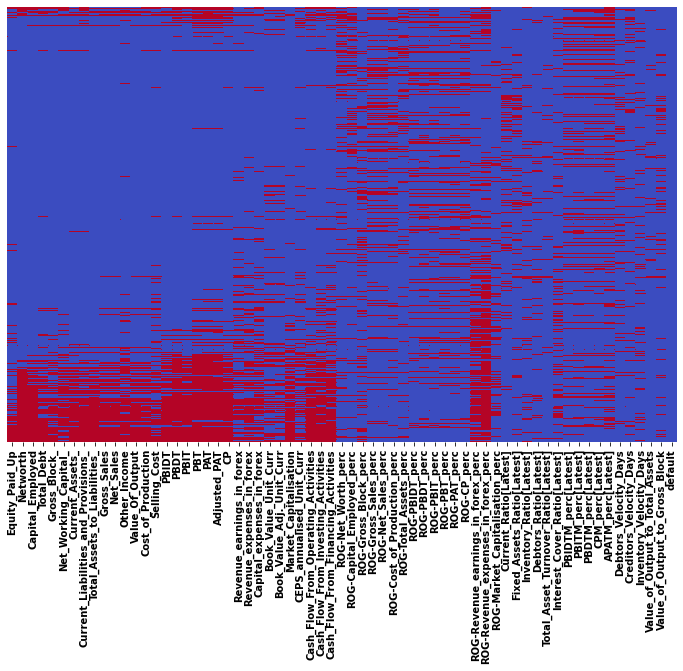

In [33]:
plt.figure(figsize = (12,8))
sns.heatmap(Company_sub1.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

#### We should inspect total missing values by each row.

In [34]:
Company_sub1.isnull().sum(axis = 1)

0       19
1       34
2       43
3       36
4       35
5        9
6       37
7       34
8       24
9       27
10      20
11      34
12      21
13      35
14      27
15      35
16      34
17      31
18      12
19      22
20      23
21      16
22      33
23      38
24      28
25      21
26      14
27      11
28      14
29      33
30      27
31      22
32      21
33      15
34      30
35      28
36      22
37      30
38      11
39      25
40      25
41      27
42      16
43       4
44      23
45      21
46      34
47      27
48      29
49      10
50      28
51      28
52      16
53      35
54      31
55      20
56      17
57      17
58      10
59      12
60      23
61      20
62      29
63      15
64      19
65      16
66      32
67      26
68      15
69      17
70      23
71      16
72       9
73      11
74      34
75      18
76      21
77      26
78      20
79      18
80      20
81       5
82      23
83      10
84      22
85      21
86      14
87      14
88      24
89      23
90      26

#### Let's filter the data which is 90% or more complete at the row level

In [35]:
Company_sub1_temp = Company_sub1[Company_sub1.isnull().sum(axis = 1) <= 5]

In [36]:
print('The shape of the dataframe after filtering is', Company_sub1_temp.shape )

The shape of the dataframe after filtering is (1203, 65)


In [37]:
Company_sub1_temp['default'].value_counts()

0    1085
1     118
Name: default, dtype: int64

In [38]:
Company_sub1_temp['default'].value_counts(normalize = True)

0   0.90
1   0.10
Name: default, dtype: float64

In [39]:
118/1203

0.09808811305070657

#### We came down to 612 rows from 3586 rows frows provided originally, we lose a larger proportion of actual defaulters 388 in the original data vs. only 78 in the subset, threfore, end up losing more than 80% of the actual defaulters.

In [40]:
Company_sub1['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [41]:
Company_sub1.isnull().sum().sort_values(ascending = False)/Company_sub1.index.size

ROG-Revenue_expenses_in_forex_perc    0.45
ROG-Revenue_earnings_in_forex_perc    0.37
Cash_Flow_From_Financing_Activities   0.28
PAT                                   0.27
Adjusted_PAT                          0.27
PBT                                   0.26
APATM_perc[Latest]                    0.26
Cash_Flow_From_Investing_Activities   0.24
ROG-Gross_Block_perc                  0.23
CP                                    0.23
PBDT                                  0.23
Cash_Flow_From_Operating_Activities   0.22
ROG-Net_Worth_perc                    0.21
Revenue_earnings_in_forex             0.21
Interest_Cover_Ratio[Latest]          0.20
CPM_perc[Latest]                      0.20
PBIT                                  0.20
PBITM_perc[Latest]                    0.20
PBDTM_perc[Latest]                    0.19
Capital_expenses_in_forex             0.19
Revenue_expenses_in_forex             0.19
ROG-Cost_of_Production_perc           0.19
ROG-Gross_Sales_perc                  0.19
PBIDT      

#### Dropping columns with more than 20% missing values 

In [42]:
Company_sub2 = Company_sub1.drop(['ROG-Revenue_expenses_in_forex_perc','ROG-Revenue_earnings_in_forex_perc','Cash_Flow_From_Financing_Activities','PAT','PBT','Adjusted_PAT','APATM_perc[Latest]','Cash_Flow_From_Investing_Activities','CP','ROG-Gross_Block_perc','PBDT','Revenue_expenses_in_forex','Cash_Flow_From_Operating_Activities','ROG-Net_Worth_perc'],
                           axis = 1)

In [43]:
print('The shape of the dataframe after dropping columns with more than 20% missing values is',Company_sub2.shape)

The shape of the dataframe after dropping columns with more than 20% missing values is (3586, 51)


#### Segregate the predictors and response 

In [44]:
predictors = Company_sub2.drop('default', axis = 1)
response = Company_sub2['default']

#### Scale the predictors 

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [46]:
Company_sub3 = pd.concat([scaled_predictors, response], axis = 1)

#### Imputing the remaining missing values

In [47]:
from sklearn.impute import KNNImputer #MICE FancyImpute

In [48]:
imputer = KNNImputer(n_neighbors=10)

In [49]:
Company_imputed = pd.DataFrame(imputer.fit_transform(Company_sub3), columns = Company_sub3.columns)

In [50]:
Company_imputed.isnull().sum()

Equity_Paid_Up                         0
Networth                               0
Capital_Employed                       0
Total_Debt                             0
Gross_Block_                           0
Net_Working_Capital_                   0
Current_Assets_                        0
Current_Liabilities_and_Provisions_    0
Total_Assets_to_Liabilities_           0
Gross_Sales                            0
Net_Sales                              0
Other_Income                           0
Value_Of_Output                        0
Cost_of_Production                     0
Selling_Cost                           0
PBIDT                                  0
PBIT                                   0
Revenue_earnings_in_forex              0
Capital_expenses_in_forex              0
Book_Value_Unit_Curr                   0
Book_Value_Adj._Unit_Curr              0
Market_Capitalisation                  0
CEPS_annualised_Unit_Curr              0
ROG-Capital_Employed_perc              0
ROG-Gross_Sales_

In [51]:
Company_imputed.isnull().sum().sum()

0

#### Inspect possible correlations between independent variables 

<AxesSubplot:>

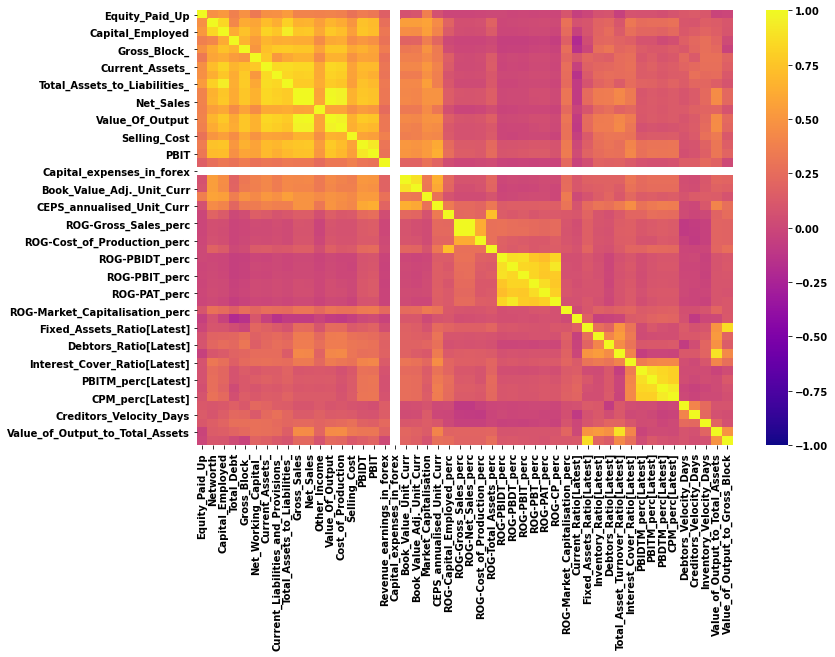

In [52]:
plt.figure(figsize = (12,8))
cor_matrix = Company_imputed.drop('default', axis = 1).corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

<B>EDA

In [53]:
Company_EDA = Company_imputed[['default','Networth', 'Capital_Employed', 'Gross_Block_', 'Current_Assets_','Current_Liabilities_and_Provisions_','Value_Of_Output','Cost_of_Production','PBIDT','PBIT','Book_Value_Unit_Curr','Book_Value_Adj._Unit_Curr','Current_Ratio[Latest]','Total_Asset_Turnover_Ratio[Latest]','Interest_Cover_Ratio[Latest]','Value_of_Output_to_Total_Assets']]

In [54]:
Company_EDA.head()

default  Networth  Capital_Employed  Gross_Block_  Current_Assets_  \
0     1.00     -0.28             -0.45         -0.14            -0.07   
1     1.00      0.05              1.01          0.94             0.45   
2     1.00      1.72              2.10          2.38             1.94   
3     1.00      0.72              1.09          0.70             0.92   
4     1.00      0.64              0.19          0.63             0.17   

   Current_Liabilities_and_Provisions_  Value_Of_Output  Cost_of_Production  \
0                                -0.34            -0.61                0.79   
1                                 0.99             0.45                0.42   
2                                 2.16             1.83                3.53   
3                                 0.24             0.32                0.51   
4                                 0.08            -0.29                1.28   

   PBIDT  PBIT  Book_Value_Unit_Curr  Book_Value_Adj._Unit_Curr  \
0  -0.37 -0.34                 -0.63                      -0.62   
1   0.49  3.43                 -1.15                      -1.25   
2   1.56  1.23                  1.59                       2.01   
3   0.01  0.28                 -1.77                      -1.98   
4   0.24  0.08                  0.58                      -0.01   

   Current_Ratio[Latest]  Total_Asset_Turnover_Ratio[Latest]  \
0                  -1.33                               -0.91   
1                  -1.27                               -0.58   
2                  -0.35                               -0.91   
3                  -1.26                               -0.91   
4                  -0.87                               -0.90   

   Interest_Cover_Ratio[Latest]  Value_of_Output_to_Total_Assets  
0                         -0.65                            -0.97  
1                         -0.94                            -0.50  
2                         -1.56                            -1.02  
3                         -0.63                            -0.61  
4                         -0.89                            -0.96

In [55]:
Company_EDA.tail()

default  Networth  Capital_Employed  Gross_Block_  Current_Assets_  \
3581     0.00      0.02             -0.34         -0.13            -0.61   
3582     0.00      0.14              0.42          0.29             0.05   
3583     0.00      0.96              0.50          1.15             1.19   
3584     0.00      1.18              1.10          1.00             0.69   
3585     0.00      0.24             -0.32          0.29             0.07   

      Current_Liabilities_and_Provisions_  Value_Of_Output  \
3581                                -0.52            -0.45   
3582                                 1.15             0.16   
3583                                 1.26             1.48   
3584                                 1.11             0.63   
3585                                -0.04            -0.31   

      Cost_of_Production  PBIDT  PBIT  Book_Value_Unit_Curr  \
3581               -0.14  -0.42 -0.35                  0.69   
3582                0.11   1.03  0.95                  2.11   
3583                1.68   1.29  1.68                  1.86   
3584                0.52   0.80  0.75                  1.71   
3585               -0.46  -0.00  0.15                  0.25   

      Book_Value_Adj._Unit_Curr  Current_Ratio[Latest]  \
3581                       0.51                  -1.35   
3582                       2.62                  -0.97   
3583                       1.29                  -0.63   
3584                       2.15                  -0.54   
3585                       0.64                  -0.78   

      Total_Asset_Turnover_Ratio[Latest]  Interest_Cover_Ratio[Latest]  \
3581                               -0.91                         -0.56   
3582                               -0.58                          0.87   
3583                                1.98                          3.32   
3584                               -0.48                          1.40   
3585                               -0.49                          0.66   

      Value_of_Output_to_Total_Assets  
3581                            -0.06  
3582                            -0.53  
3583                             1.18  
3584                            -0.43  
3585                            -0.34

In [56]:
Company_EDA.describe(percentiles=[.25,0.50,0.75,0.90]).T

count  mean  std   min   25%   50%  75%  \
default                             3586.00  0.11 0.31  0.00  0.00  0.00 0.00   
Networth                            3586.00  0.22 1.10 -3.21 -0.52 -0.28 0.78   
Capital_Employed                    3586.00  0.20 1.09 -3.14 -0.58 -0.32 0.67   
Gross_Block_                        3586.00  0.20 1.10 -1.19 -0.59 -0.38 0.70   
Current_Assets_                     3586.00  0.21 1.11 -0.69 -0.61 -0.32 0.74   
Current_Liabilities_and_Provisions_ 3586.00  0.20 1.09 -0.62 -0.59 -0.35 0.66   
Value_Of_Output                     3586.00  0.23 1.15 -1.57 -0.60 -0.37 0.74   
Cost_of_Production                  3586.00  0.24 1.15 -0.84 -0.60 -0.37 0.76   
PBIDT                               3586.00  0.28 1.18 -3.12 -0.47 -0.31 0.82   
PBIT                                3586.00  0.27 1.16 -3.13 -0.43 -0.29 0.86   
Book_Value_Unit_Curr                3586.00  0.08 0.98 -2.96 -0.56 -0.24 0.61   
Book_Value_Adj._Unit_Curr           3586.00  0.08 0.99 -2.90 -0.57 -0.23 0.63   
Current_Ratio[Latest]               3586.00  0.03 0.94 -1.35 -0.54 -0.14 0.41   
Total_Asset_Turnover_Ratio[Latest]  3586.00  0.06 1.02 -0.91 -0.83 -0.28 0.72   
Interest_Cover_Ratio[Latest]        3586.00  0.07 0.96 -3.04 -0.56 -0.10 0.57   
Value_of_Output_to_Total_Assets     3586.00  0.04 1.01 -1.48 -0.87 -0.26 0.73   

                                     90%  max  
default                             1.00 1.00  
Networth                            1.95 4.06  
Capital_Employed                    1.96 4.16  
Gross_Block_                        2.03 4.09  
Current_Assets_                     2.03 4.28  
Current_Liabilities_and_Provisions_ 1.96 4.23  
Value_Of_Output                     2.16 4.14  
Cost_of_Production                  2.21 4.17  
PBIDT                               2.24 4.15  
PBIT                                2.21 4.07  
Book_Value_Unit_Curr                1.47 3.41  
Book_Value_Adj._Unit_Curr           1.50 3.34  
Current_Ratio[Latest]               1.21 3.92  
Total_Asset_Turnover_Ratio[Latest]  1.57 3.24  
Interest_Cover_Ratio[Latest]        1.33 3.61  
Value_of_Output_to_Total_Assets     1.56 3.27

In [57]:
Company_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   default                              3586 non-null   float64
 1   Networth                             3586 non-null   float64
 2   Capital_Employed                     3586 non-null   float64
 3   Gross_Block_                         3586 non-null   float64
 4   Current_Assets_                      3586 non-null   float64
 5   Current_Liabilities_and_Provisions_  3586 non-null   float64
 6   Value_Of_Output                      3586 non-null   float64
 7   Cost_of_Production                   3586 non-null   float64
 8   PBIDT                                3586 non-null   float64
 9   PBIT                                 3586 non-null   float64
 10  Book_Value_Unit_Curr                 3586 non-null   float64
 11  Book_Value_Adj._Unit_Curr     

In [58]:
Company_EDA.shape

(3586, 16)

In [59]:
Company_EDA.isnull().sum()

default                                0
Networth                               0
Capital_Employed                       0
Gross_Block_                           0
Current_Assets_                        0
Current_Liabilities_and_Provisions_    0
Value_Of_Output                        0
Cost_of_Production                     0
PBIDT                                  0
PBIT                                   0
Book_Value_Unit_Curr                   0
Book_Value_Adj._Unit_Curr              0
Current_Ratio[Latest]                  0
Total_Asset_Turnover_Ratio[Latest]     0
Interest_Cover_Ratio[Latest]           0
Value_of_Output_to_Total_Assets        0
dtype: int64

In [60]:
la = Company_EDA.duplicated()
Company_EDA[la]

Empty DataFrame
Columns: [default, Networth, Capital_Employed, Gross_Block_, Current_Assets_, Current_Liabilities_and_Provisions_, Value_Of_Output, Cost_of_Production, PBIDT, PBIT, Book_Value_Unit_Curr, Book_Value_Adj._Unit_Curr, Current_Ratio[Latest], Total_Asset_Turnover_Ratio[Latest], Interest_Cover_Ratio[Latest], Value_of_Output_to_Total_Assets]
Index: []

In [61]:
Company_EDA.skew(axis = 0, skipna = True)

default                               2.52
Networth                              1.20
Capital_Employed                      1.41
Gross_Block_                          1.45
Current_Assets_                       1.42
Current_Liabilities_and_Provisions_   1.52
Value_Of_Output                       1.43
Cost_of_Production                    1.38
PBIDT                                 1.17
PBIT                                  1.01
Book_Value_Unit_Curr                  0.93
Book_Value_Adj._Unit_Curr             0.91
Current_Ratio[Latest]                 1.34
Total_Asset_Turnover_Ratio[Latest]    0.98
Interest_Cover_Ratio[Latest]          0.78
Value_of_Output_to_Total_Assets       0.87
dtype: float64

In [62]:
Company_EDA_num = Company_EDA.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(Company_EDA_num.columns.values)
len(lstnumericcolumns)

16

In [63]:
def univariateAnalysis_numeric(column,nbins):
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(Company_EDA[column], kde=True, color='g', rug=True);
    plt.show()

Distribution of default
----------------------------------------------------------------------------


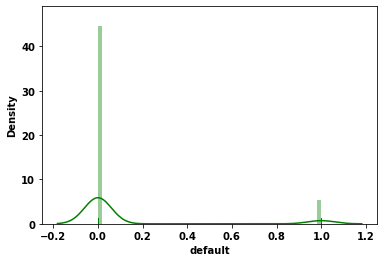

Distribution of Networth
----------------------------------------------------------------------------


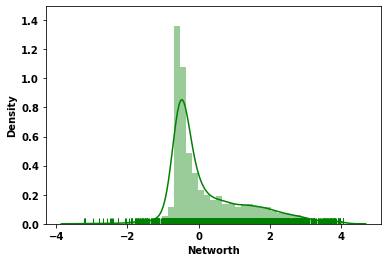

Distribution of Capital_Employed
----------------------------------------------------------------------------


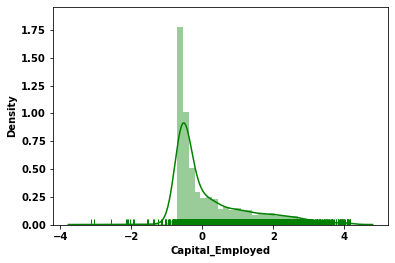

Distribution of Gross_Block_
----------------------------------------------------------------------------


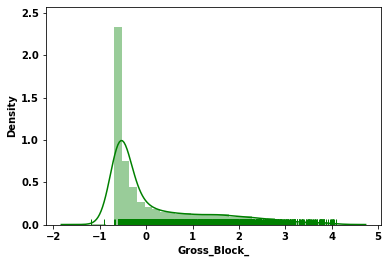

Distribution of Current_Assets_
----------------------------------------------------------------------------


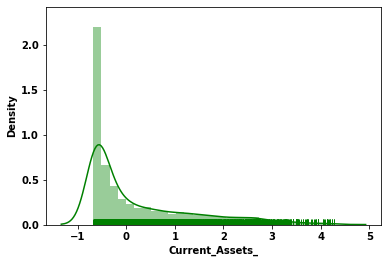

Distribution of Current_Liabilities_and_Provisions_
----------------------------------------------------------------------------


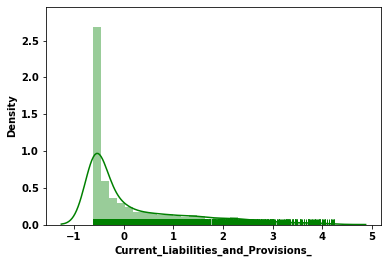

Distribution of Value_Of_Output
----------------------------------------------------------------------------


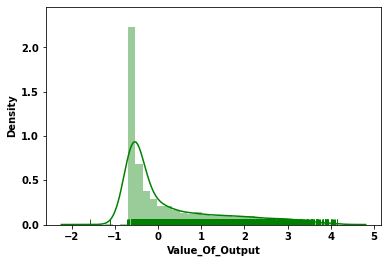

Distribution of Cost_of_Production
----------------------------------------------------------------------------


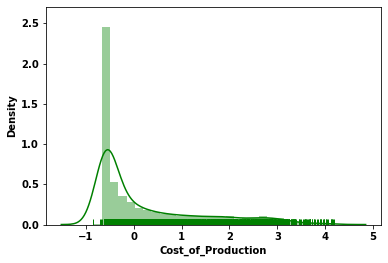

Distribution of PBIDT
----------------------------------------------------------------------------


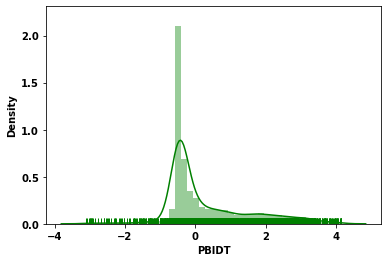

Distribution of PBIT
----------------------------------------------------------------------------


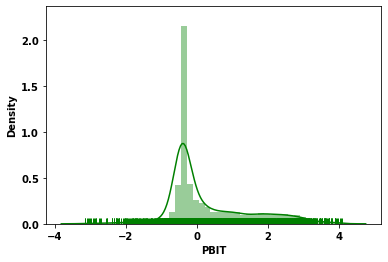

Distribution of Book_Value_Unit_Curr
----------------------------------------------------------------------------


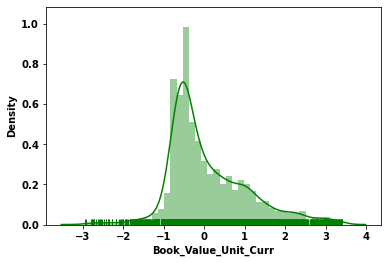

Distribution of Book_Value_Adj._Unit_Curr
----------------------------------------------------------------------------


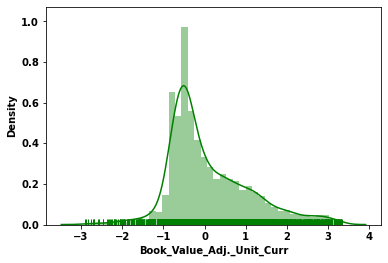

Distribution of Current_Ratio[Latest]
----------------------------------------------------------------------------


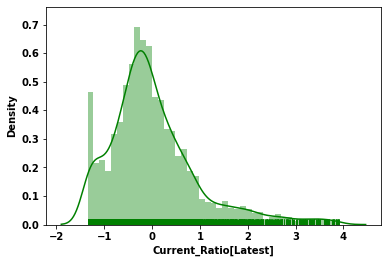

Distribution of Total_Asset_Turnover_Ratio[Latest]
----------------------------------------------------------------------------


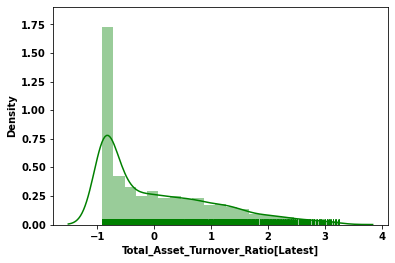

Distribution of Interest_Cover_Ratio[Latest]
----------------------------------------------------------------------------


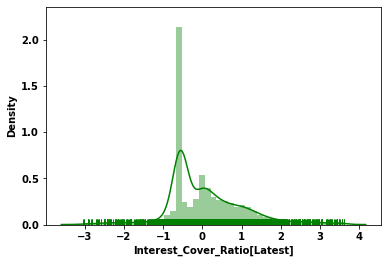

Distribution of Value_of_Output_to_Total_Assets
----------------------------------------------------------------------------


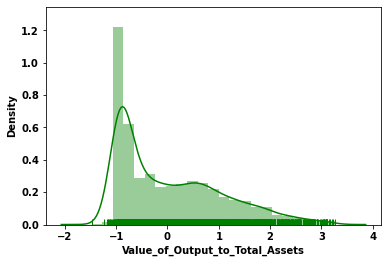

In [64]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [65]:
def univariateAnalysis_numeric(column,nbins):
    print("Histogram of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.histplot(x=Company_EDA[column],color='y',bins=30)
    plt.show()

Histogram of default
----------------------------------------------------------------------------


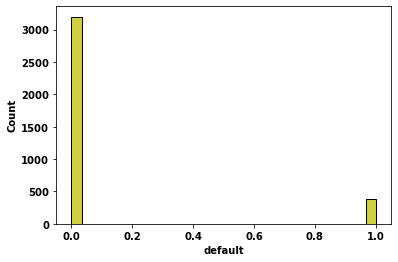

Histogram of Networth
----------------------------------------------------------------------------


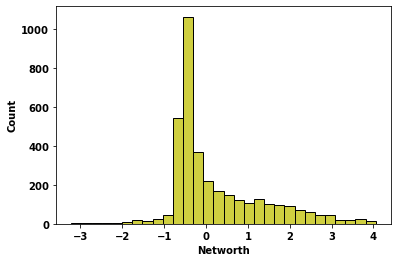

Histogram of Capital_Employed
----------------------------------------------------------------------------


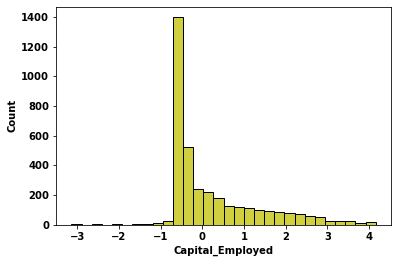

Histogram of Gross_Block_
----------------------------------------------------------------------------


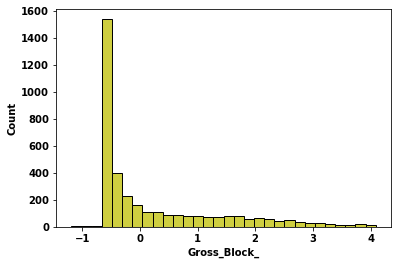

Histogram of Current_Assets_
----------------------------------------------------------------------------


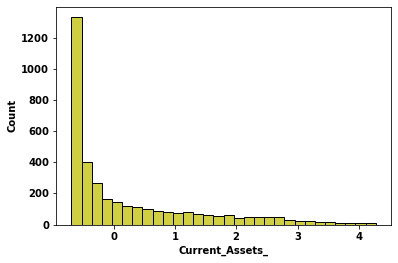

Histogram of Current_Liabilities_and_Provisions_
----------------------------------------------------------------------------


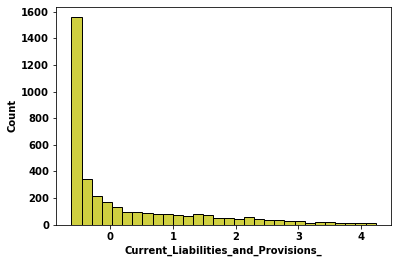

Histogram of Value_Of_Output
----------------------------------------------------------------------------


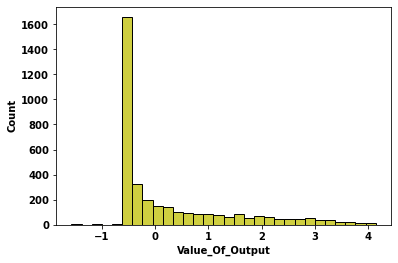

Histogram of Cost_of_Production
----------------------------------------------------------------------------


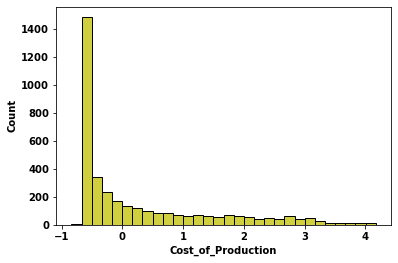

Histogram of PBIDT
----------------------------------------------------------------------------


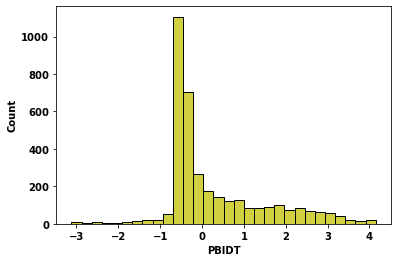

Histogram of PBIT
----------------------------------------------------------------------------


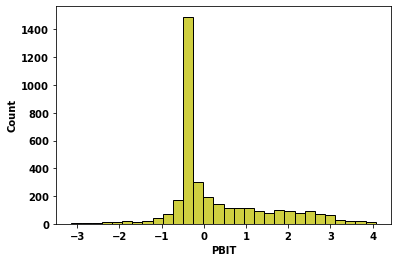

Histogram of Book_Value_Unit_Curr
----------------------------------------------------------------------------


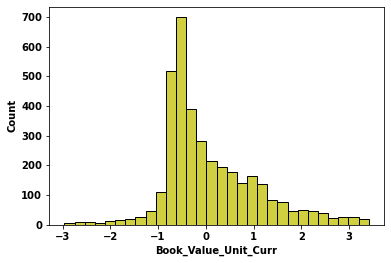

Histogram of Book_Value_Adj._Unit_Curr
----------------------------------------------------------------------------


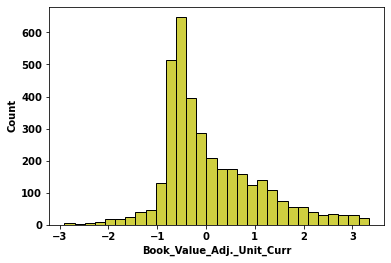

Histogram of Current_Ratio[Latest]
----------------------------------------------------------------------------


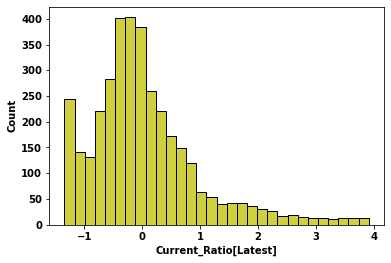

Histogram of Total_Asset_Turnover_Ratio[Latest]
----------------------------------------------------------------------------


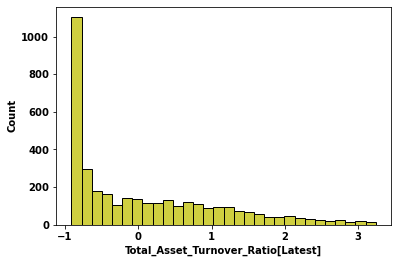

Histogram of Interest_Cover_Ratio[Latest]
----------------------------------------------------------------------------


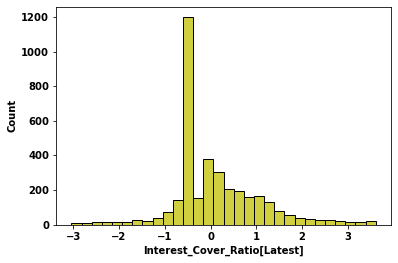

Histogram of Value_of_Output_to_Total_Assets
----------------------------------------------------------------------------


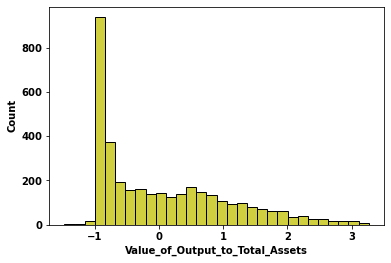

In [66]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [67]:
def univariateAnalysis_numeric(column,nbins):
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=Company_EDA[column])
    plt.show()

BoxPlot of default
----------------------------------------------------------------------------


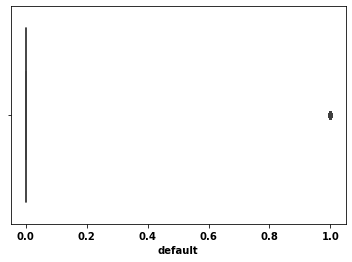

BoxPlot of Networth
----------------------------------------------------------------------------


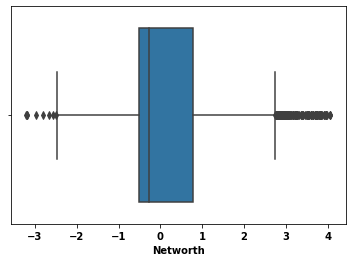

BoxPlot of Capital_Employed
----------------------------------------------------------------------------


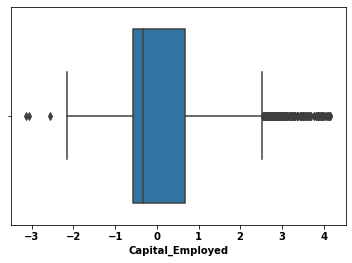

BoxPlot of Gross_Block_
----------------------------------------------------------------------------


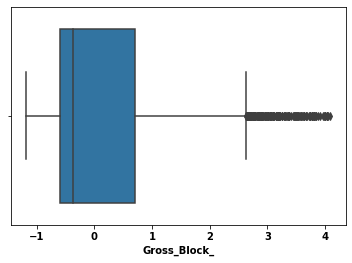

BoxPlot of Current_Assets_
----------------------------------------------------------------------------


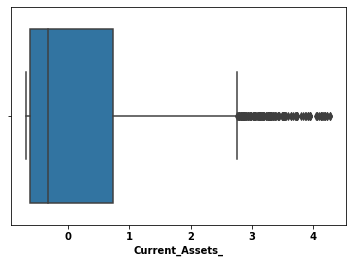

BoxPlot of Current_Liabilities_and_Provisions_
----------------------------------------------------------------------------


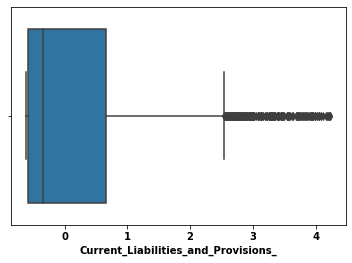

BoxPlot of Value_Of_Output
----------------------------------------------------------------------------


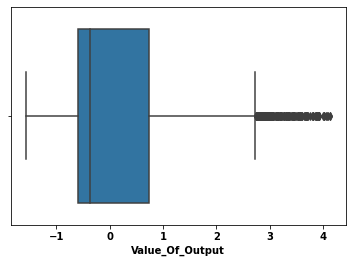

BoxPlot of Cost_of_Production
----------------------------------------------------------------------------


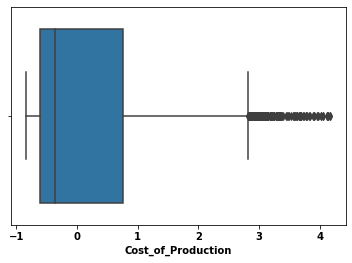

BoxPlot of PBIDT
----------------------------------------------------------------------------


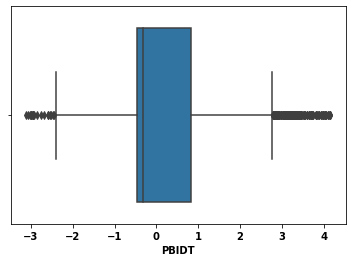

BoxPlot of PBIT
----------------------------------------------------------------------------


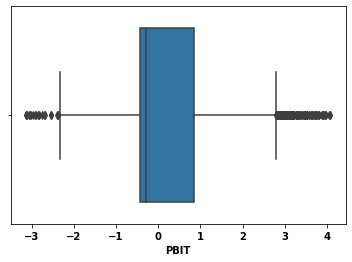

BoxPlot of Book_Value_Unit_Curr
----------------------------------------------------------------------------


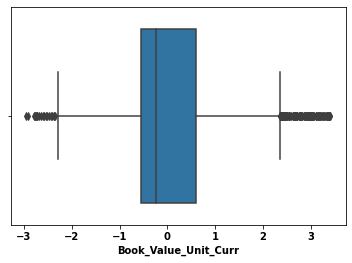

BoxPlot of Book_Value_Adj._Unit_Curr
----------------------------------------------------------------------------


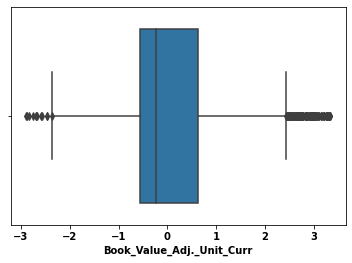

BoxPlot of Current_Ratio[Latest]
----------------------------------------------------------------------------


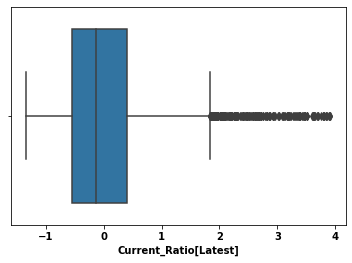

BoxPlot of Total_Asset_Turnover_Ratio[Latest]
----------------------------------------------------------------------------


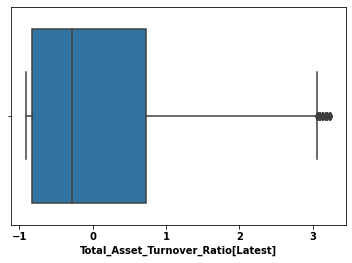

BoxPlot of Interest_Cover_Ratio[Latest]
----------------------------------------------------------------------------


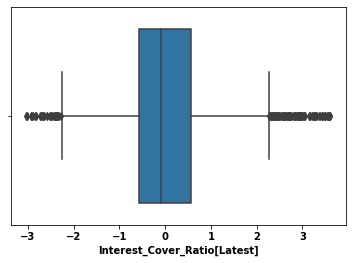

BoxPlot of Value_of_Output_to_Total_Assets
----------------------------------------------------------------------------


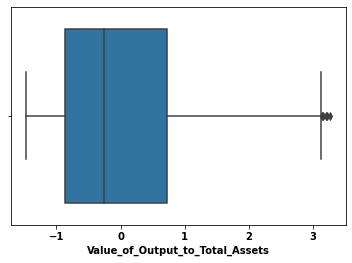

In [68]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

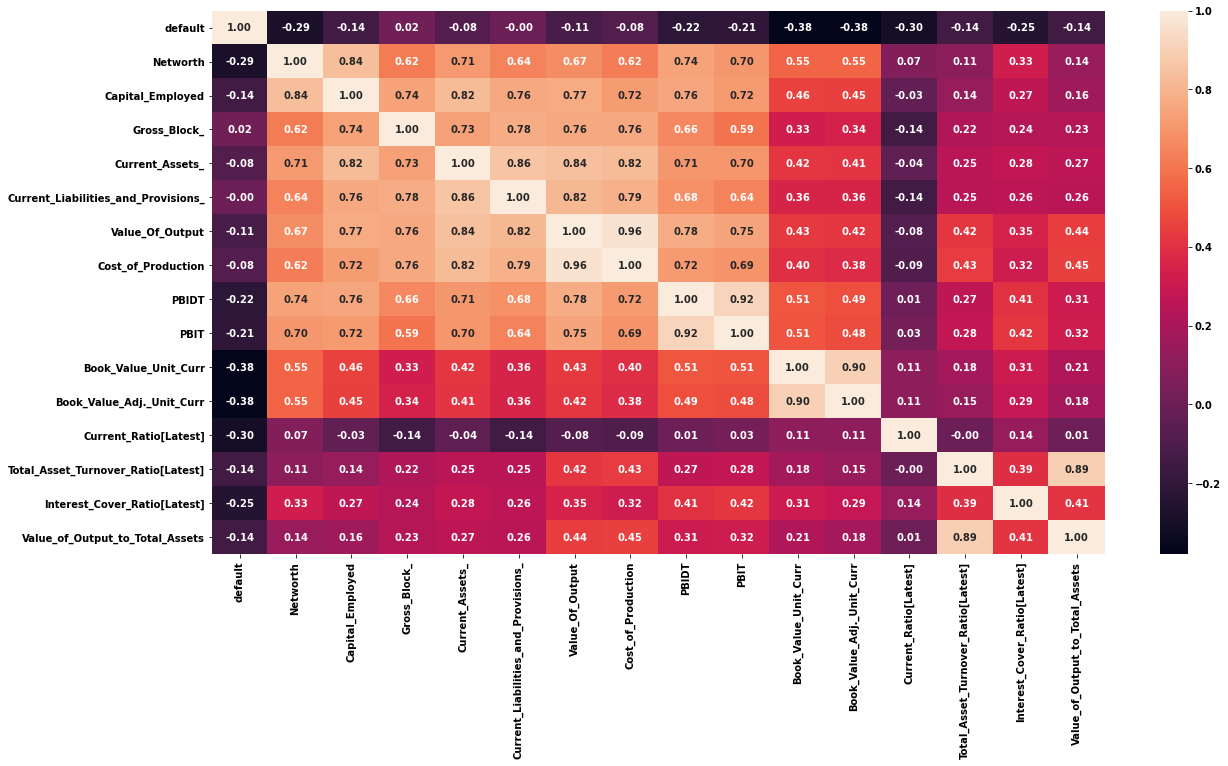

In [69]:
plt.figure(figsize=(20,10))
sns.heatmap(Company_EDA.corr(),annot=True,fmt=".2f");


<Figure size 432x288 with 0 Axes>

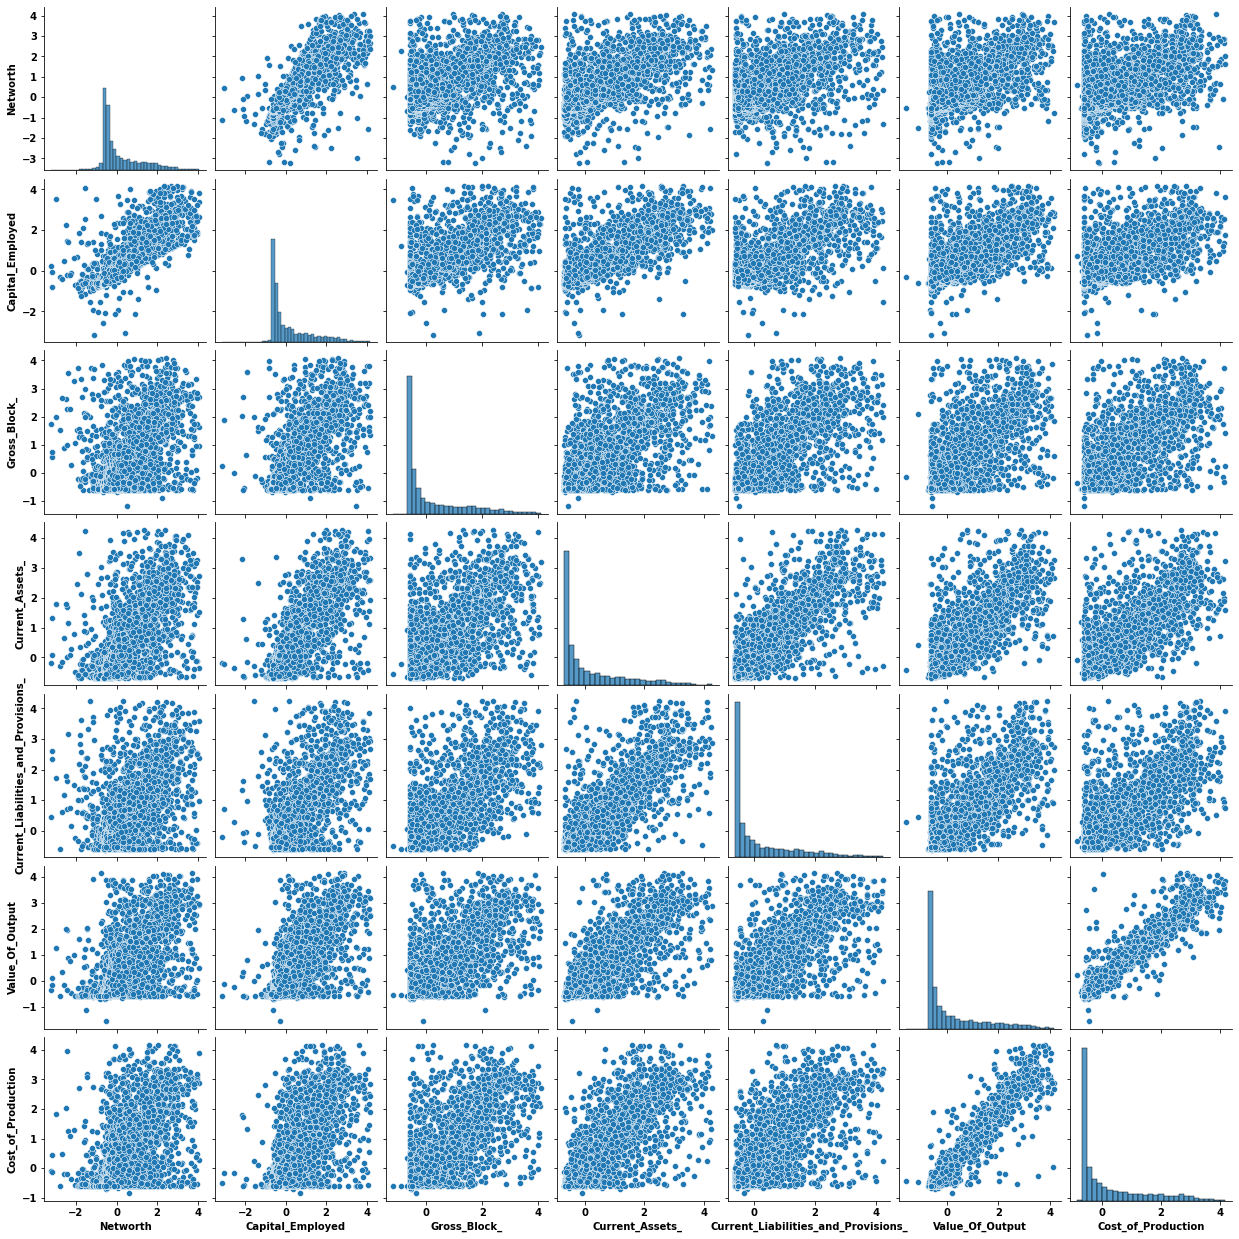

In [70]:
plt.figure()
sns.pairplot(Company_EDA, vars=['Networth', 'Capital_Employed', 'Gross_Block_', 'Current_Assets_','Current_Liabilities_and_Provisions_','Value_Of_Output','Cost_of_Production',], )
plt.show()

<B>MODELLING: 

In [71]:
predictors = Company_imputed.drop('default', axis = 1)
response = Company_imputed['default']

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE #recursive feature elimination
from sklearn.linear_model import LogisticRegression

#### Splitting the data into train and test sets

In [73]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, 
                                                    test_size = 0.33, random_state = 42)

In [74]:
y_train.value_counts(1)

0.00   0.90
1.00   0.10
Name: default, dtype: float64

In [75]:
y_test.value_counts(1)

0.00   0.88
1.00   0.12
Name: default, dtype: float64

In [76]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (2402, 50)
Number of rows and columns of the training set for the dependent variable: (2402,)
Number of rows and columns of the test set for the independent variables: (1184, 50)
Number of rows and columns of the test set for the dependent variable: (1184,)


#### For modeling we will use Logistic Regression with recursive feature elimination

In [77]:
LogR = LogisticRegression()

In [78]:
selector = RFE(estimator = LogR, n_features_to_select=15, step=1)

In [79]:
selector = selector.fit(X_train, y_train)

In [80]:
selector.n_features_

15

In [81]:
selector.ranking_

array([34,  1,  1,  5,  1,  8,  1,  1,  2,  3,  4, 10,  1,  1, 24,  1,  1,
       35, 36,  1,  1, 16, 33,  6, 14, 19, 20,  7, 30, 13, 22, 18, 29, 12,
       32,  1,  9, 21, 23,  1,  1, 11, 31, 25, 26, 27, 17, 15,  1, 28])

In [82]:
df = pd.DataFrame({'Feature': scaled_predictors.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 1]

Feature  Rank
1                              Networth     1
2                      Capital_Employed     1
4                          Gross_Block_     1
6                       Current_Assets_     1
7   Current_Liabilities_and_Provisions_     1
12                      Value_Of_Output     1
13                   Cost_of_Production     1
15                                PBIDT     1
16                                 PBIT     1
19                 Book_Value_Unit_Curr     1
20            Book_Value_Adj._Unit_Curr     1
35                Current_Ratio[Latest]     1
39   Total_Asset_Turnover_Ratio[Latest]     1
40         Interest_Cover_Ratio[Latest]     1
48      Value_of_Output_to_Total_Assets     1

#### Validating the model on train and test set 

In [83]:
from sklearn.metrics import confusion_matrix, classification_report

In [84]:
pred_train = selector.predict(X_train)
pred_test = selector.predict(X_test)

In [85]:
print(confusion_matrix(y_train, pred_train))

[[2138   19]
 [  97  148]]


In [86]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [87]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2157
         1.0       0.89      0.60      0.72       245

    accuracy                           0.95      2402
   macro avg       0.92      0.80      0.85      2402
weighted avg       0.95      0.95      0.95      2402



In [88]:
print(confusion_matrix(y_test, pred_test))

[[1024   17]
 [  44   99]]


In [89]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1041
         1.0       0.85      0.69      0.76       143

    accuracy                           0.95      1184
   macro avg       0.91      0.84      0.87      1184
weighted avg       0.95      0.95      0.95      1184



We see poor recall score for both train and test

In [90]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [91]:
selector_smote = selector.fit(X_res, y_res)

In [92]:
selector_smote.n_features_

15

In [93]:
pred_train_smote = selector_smote.predict(X_res)
pred_test_smote = selector_smote.predict(X_test)

In [94]:
print(classification_report(y_res, pred_train_smote))

              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92      2157
         1.0       0.91      0.93      0.92      2157

    accuracy                           0.92      4314
   macro avg       0.92      0.92      0.92      4314
weighted avg       0.92      0.92      0.92      4314



In [95]:
print(classification_report(y_test, pred_test_smote))

              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94      1041
         1.0       0.54      0.96      0.69       143

    accuracy                           0.89      1184
   macro avg       0.76      0.92      0.81      1184
weighted avg       0.94      0.89      0.91      1184



<AxesSubplot:>

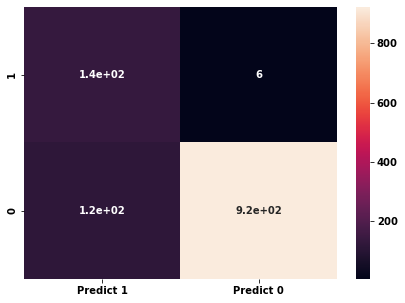

In [96]:
# Plotting Confusion Matrix of test data for class '1' and '0'

cm=metrics.confusion_matrix(y_test, pred_test_smote, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

# FRA Milestone 2

### Ques 1.8 - Build a Random Forest Model on Train Dataset. Also showcase your model building approach.

#### Importing Random Forest Classifier from sklearn.ensemble

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
RF = RandomForestClassifier(n_estimators=350,criterion='gini',max_depth=6,min_samples_split=3,max_features="auto")
RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, max_features='auto', min_samples_split=3,
                       n_estimators=350)

#### Inference: 

* We have used Random Forest algorithm to fit model on train data set, also using parameters like n_estimators=350, criterion='gini', max_depth=6 and min_samples_split=3, max_features='auto'.  


### Ques 1.9- Validate the Random Forest Model on test Dataset and state the performance matrices. Also state interpretation from the model.

In [99]:
# Printing model score for train and test data along with confusion matrix and classification reports.

y_train_predict=RF.predict(X_train)
model_score=RF.score(X_train,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

y_test_predict=RF.predict(X_test)
model_score=RF.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.9845961698584513
[[2153    4]
 [  33  212]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2157
         1.0       0.98      0.87      0.92       245

    accuracy                           0.98      2402
   macro avg       0.98      0.93      0.96      2402
weighted avg       0.98      0.98      0.98      2402

0.9746621621621622
[[1033    8]
 [  22  121]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1041
         1.0       0.94      0.85      0.89       143

    accuracy                           0.97      1184
   macro avg       0.96      0.92      0.94      1184
weighted avg       0.97      0.97      0.97      1184



<AxesSubplot:>

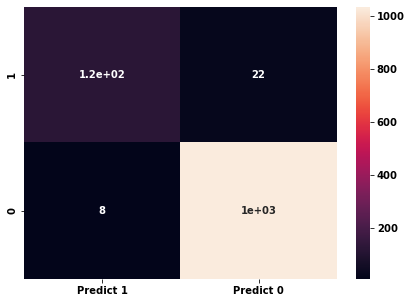

In [100]:
# Plotting Confusion Matrix of test data for class '1' and '0'

cm=metrics.confusion_matrix(y_test, y_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

#### Inference: 

* As we can observe from the above model's classification report, confusion matrix score and confusion matrix plot, Accuracy score of train and test set data is quite descent, precision and f1 score also seems to be good, however the score of recall value is little low in both the train and test data which is an important indicator for this model because we cannot afford to leave default companies undeclared or unidentified. 


### Ques 1.10 - Build a LDA Model on Train Dataset. Also showcase your model building approach.

In [101]:
# Importing LinearDiscriminantAnalysis from library sklearn.discriminant_analysis.

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn import metrics

# Assigning LinearDiscriminantAnalysis() a name LDA_model.

LDA_model=LinearDiscriminantAnalysis()

In [102]:
# Making a tuned LDA Model on train dataset.

#  Creating param_grid2 contaning model tuning parameters like 'solver', 'shrinkage'.

param_grid2 = [{
                'solver' : ['svd', 'lsqr', 'eigen'],
                'shrinkage': ['auto', 'float', None],
                
}]

In [103]:
# Importing and Applying GridSearchCV on LinearDiscriminantAnalysis() with param_grid including cv=5, verbose=True and n_jobs=-1.

from sklearn.model_selection import GridSearchCV
clf2 = GridSearchCV(LinearDiscriminantAnalysis(), param_grid = param_grid2, cv = 5, verbose=True, n_jobs=-1)

In [104]:
# Fitting Assigning best_Clf2 a new variable and fitting clf2 to train data.

best_clf2 = clf2.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [105]:
# checking best parameters

best_clf2.best_params_

{'shrinkage': 'auto', 'solver': 'lsqr'}

#### Inference: 

* In this model, we have used hypertuned parameters such as param_grid in which we have applied solver and shrinkage for maximum optimization of the model. 

### Ques 1.11- Validate the LDA Model on test Dataset and state the performance matrices. Also state interpretation from the model.

In [106]:
# Printing model score for train and test data along with confusion matrix and classification reports.

y_train_predict=best_clf2.predict(X_train)
model_score=best_clf2.score(X_train,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

y_test_predict=best_clf2.predict(X_test)
model_score=best_clf2.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.9313072439633638
[[2126   31]
 [ 134  111]]
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      2157
         1.0       0.78      0.45      0.57       245

    accuracy                           0.93      2402
   macro avg       0.86      0.72      0.77      2402
weighted avg       0.92      0.93      0.92      2402

0.9180743243243243
[[1024   17]
 [  80   63]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      1041
         1.0       0.79      0.44      0.57       143

    accuracy                           0.92      1184
   macro avg       0.86      0.71      0.76      1184
weighted avg       0.91      0.92      0.91      1184



<AxesSubplot:>

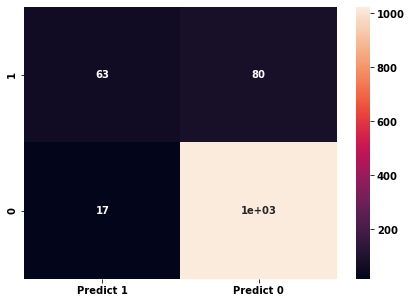

In [107]:
# Plotting Confusion Matrix of test data for class '1' and '0'

cm=metrics.confusion_matrix(y_test, y_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

#### Inference: 

* From the above classification report, confusion matrix report we can observe that even after using hyperparamters, this model doesn't seem to be performed well, apart from accuracy score, the other parameters of the model don't seem to be performing well. Hence, we can say that for this problem statement this model is not appropriate.

### Ques 1.12-  Compare the performances of Logistics, Random Forest and LDA models (include ROC Curve).

roc_score for Logistic Regression:  0.9706777372483424


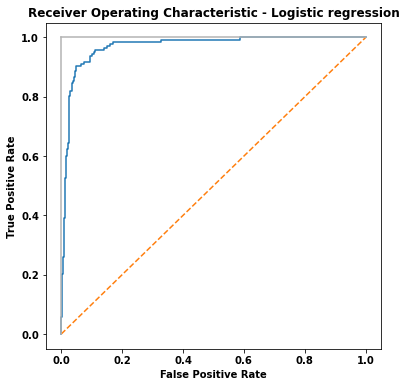

In [108]:
# Importing and Creating Roc Curve and Score for logistic regression

from sklearn.metrics import roc_curve, roc_auc_score
selector.fit(X_res, y_res);
y_score1 = selector.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_score for Logistic Regression: ', roc_auc_score(y_test, y_score1))

# plotting roc_curve

plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

roc_score with RandomForest):  0.9876127714744429


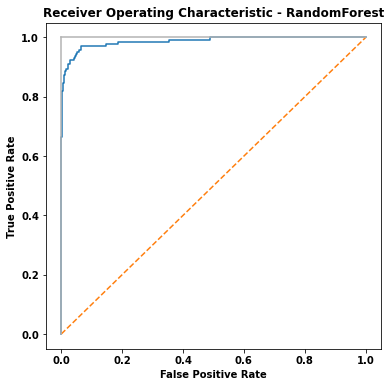

In [109]:
# Creating Roc Curve and Score for Random Forest

y_score1 = RF.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_score with RandomForest): ', roc_auc_score(y_test, y_score1))

# plotting roc_curve

plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic - RandomForest')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

roc_score with LDA):  0.9437200647575288


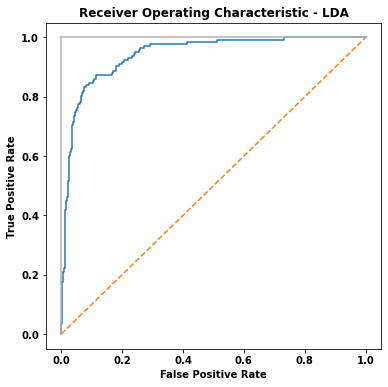

In [110]:
# Creating Roc Curve and Score for LDA.

y_score1 = clf2.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_score with LDA): ', roc_auc_score(y_test, y_score1))

# plotting roc_curve

plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic - LDA')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Inference: 

* After observing the ROC_AUC scores of the above models, we can easily infer that the best ROC_AUC Score is of Random Forest Model i.e. 98.75.

* Second best model is Logistic Regression with ROC_AUC Score of 97.06.

* Third best model is Linear Discriminant Analysis (LDA) i.e. 94.37.

* We can compare other parameters like model score and recall, precision, and f1 score from the table above. However, logistic regression model and random forest have performed equally well, random forest has given better model score, precision and f1 score, and roc_auc score but logistic regression performed better in recall score. Therefore, we can easily conclude that the best performing model is Random Forest. 

### Ques - 1.13) State Recommendations from the above models.


#### Recommendations: 

1- Accumulate more relevant data of the above mentioned important features. There are 15 important features or variables in the given data set, try to gather more data of the company for these variables.

2- Among the three models built, the most relevant model is random forest, however, we can try building more models to get the better recall value score, since the recall score of the random forest model is little low in comparison to other parameters.


## Data Set 2 - Market Risk

### Problem Statement: Market Risk - The dataset contains 6 years of information(weekly stock information) on the stock prices of 10 different Indian Stocks. Calculate the mean and standard deviation on the stock returns and share insights.

In [111]:
# Importing important Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [112]:
# Let us now go ahead and read the dataset and check the first five rows of the dataset.

stock_prices = pd.read_csv('D:\\Study\\Data Science and Machine Learning\\Great_learning course\\Main content\\Module11 -  Finance and Risk Analytics\\Project Milestone 2\\Market+Risk+Dataset.csv')

#Glimpse of Data
stock_prices.head()

Date  Infosys  Indian Hotel  Mahindra & Mahindra  Axis Bank  SAIL  \
0  31-03-2014      264            69                  455        263    68   
1  07-04-2014      257            68                  458        276    70   
2  14-04-2014      254            68                  454        270    68   
3  21-04-2014      253            68                  488        283    68   
4  28-04-2014      256            65                  482        282    63   

   Shree Cement  Sun Pharma  Jindal Steel  Idea Vodafone  Jet Airways  
0          5543         555           298             83          278  
1          5728         610           279             84          303  
2          5649         607           279             83          280  
3          5692         604           274             83          282  
4          5582         611           238             79          243

In [113]:
stock_prices.tail()

Date  Infosys  Indian Hotel  Mahindra & Mahindra  Axis Bank  SAIL  \
309  02-03-2020      729           120                  469        658    33   
310  09-03-2020      634           114                  427        569    30   
311  16-03-2020      577            90                  321        428    27   
312  23-03-2020      644            75                  293        360    21   
313  30-03-2020      633            75                  284        379    23   

     Shree Cement  Sun Pharma  Jindal Steel  Idea Vodafone  Jet Airways  
309         23110         401           146              3           22  
310         21308         384           121              6           18  
311         18904         365           105              3           16  
312         17666         338            89              3           14  
313         17546         352            82              3           14

#### Fixing messy column names (containing spaces) for ease of use

In [114]:
stock_prices.columns = stock_prices.columns.str.replace(' ', '_').str.replace('.', '')

#### Checking top 5 rows again

In [115]:
stock_prices.head()

Date  Infosys  Indian_Hotel  Mahindra_&_Mahindra  Axis_Bank  SAIL  \
0  31-03-2014      264            69                  455        263    68   
1  07-04-2014      257            68                  458        276    70   
2  14-04-2014      254            68                  454        270    68   
3  21-04-2014      253            68                  488        283    68   
4  28-04-2014      256            65                  482        282    63   

   Shree_Cement  Sun_Pharma  Jindal_Steel  Idea_Vodafone  Jet_Airways  
0          5543         555           298             83          278  
1          5728         610           279             84          303  
2          5649         607           279             83          280  
3          5692         604           274             83          282  
4          5582         611           238             79          243

#### First, let us check the number of rows (observations) and the number of columns (variables)

In [116]:
print('The number of rows (observations) is',stock_prices.shape[0],'\n''The number of columns (variables) is',stock_prices.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


#### Checking data types of all columns

In [117]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian_Hotel         314 non-null    int64 
 3   Mahindra_&_Mahindra  314 non-null    int64 
 4   Axis_Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree_Cement         314 non-null    int64 
 7   Sun_Pharma           314 non-null    int64 
 8   Jindal_Steel         314 non-null    int64 
 9   Idea_Vodafone        314 non-null    int64 
 10  Jet_Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


#### Now, let us check the basic measures of descriptive statistics for the continuous variables

In [118]:
stock_prices.describe()

Infosys  Indian_Hotel  Mahindra_&_Mahindra  Axis_Bank   SAIL  \
count   314.00        314.00               314.00     314.00 314.00   
mean    511.34        114.56               636.68     540.74  59.10   
std     135.95         22.51               102.88     115.84  15.81   
min     234.00         64.00               284.00     263.00  21.00   
25%     424.00         96.00               572.00     470.50  47.00   
50%     466.50        115.00               625.00     528.00  57.00   
75%     630.75        134.00               678.00     605.25  71.75   
max     810.00        157.00               956.00     808.00 104.00   

       Shree_Cement  Sun_Pharma  Jindal_Steel  Idea_Vodafone  Jet_Airways  
count        314.00      314.00        314.00         314.00       314.00  
mean       14806.41      633.47        147.63          53.71       372.66  
std         4288.28      171.86         65.88          31.25       202.26  
min         5543.00      338.00         53.00           3.00        14.00  
25%        10952.25      478.50         88.25          25.25       243.25  
50%        16018.50      614.00        142.50          53.00       376.00  
75%        17773.25      785.00        182.75          82.00       534.00  
max        24806.00     1089.00        338.00         117.00       871.00

#### Lets us plot & see price trend over time for different companies

### Ques - 2.1) Draw Stock Price Graph(Stock Price vs Time) for any 2 given stocks with inference.

#### Checking the stocks price movement of Sun_Pharma and Idea_Vodafone over the years.

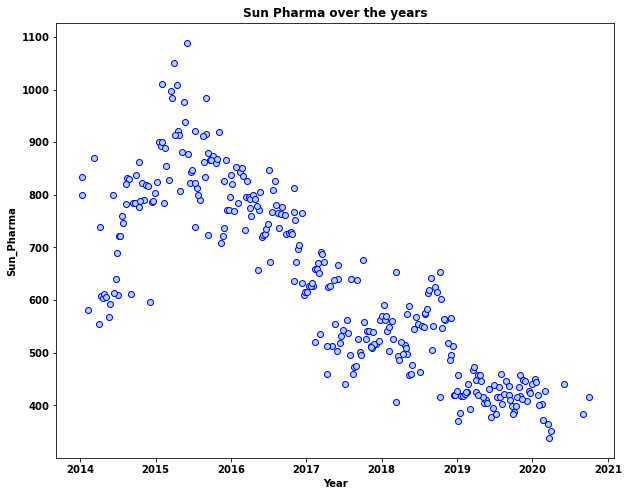

In [119]:
# Checking stock price movement of Sun_Pharma over the years. 

plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Sun_Pharma'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Sun_Pharma')
plt.title('Sun Pharma over the years')
plt.show()

#### Inference: 

* As we can see the movement of stock price of the Sun_Pharma, it first spiked from around Rs 550 in 2014 to Rs 1100 in the mid of 2015-16 after that it is showing continuous downward trend till last quarter of 2020 with nearly stock price of 450-500.  

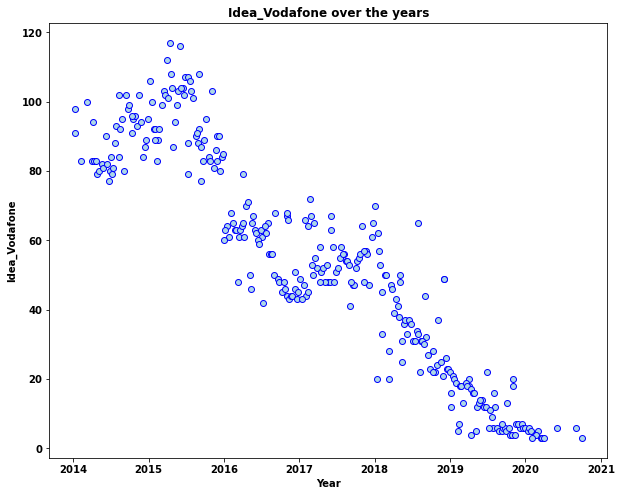

In [120]:
# Checking stock price movement of Idea_Vodafone over the years. 

plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Idea_Vodafone'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Idea_Vodafone')
plt.title('Idea_Vodafone over the years')
plt.show()

#### Inference: 

* The stock price movement of Idea_Vodafone first increased from Rs 80 in 2014 to around Rs 120 in 2015 then it started falling and with continuous downward trend it reached the stock price of around 0-5 in last quarter of 2020. 

### Ques- 2.2) Calculate Returns for all stocks with inference.

#### Analyzing returns

* Steps for calculating returns from prices:
* Take logarithms
* Take differences

In [121]:
stock_returns = np.log(stock_prices.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1) 

#### Checking the rows & columns of dataset

In [122]:
stock_returns.shape

(314, 10)

#### Checking top 5 rows 

In [123]:
stock_returns.head()

Infosys  Indian_Hotel  Mahindra_&_Mahindra  Axis_Bank  SAIL  Shree_Cement  \
0      NaN           NaN                  NaN        NaN   NaN           NaN   
1    -0.03         -0.01                 0.01       0.05  0.03          0.03   
2    -0.01          0.00                -0.01      -0.02 -0.03         -0.01   
3    -0.00          0.00                 0.07       0.05  0.00          0.01   
4     0.01         -0.05                -0.01      -0.00 -0.08         -0.02   

   Sun_Pharma  Jindal_Steel  Idea_Vodafone  Jet_Airways  
0         NaN           NaN            NaN          NaN  
1        0.09         -0.07           0.01         0.09  
2       -0.00          0.00          -0.01        -0.08  
3       -0.00         -0.02           0.00         0.01  
4        0.01         -0.14          -0.05        -0.15

In [124]:
stock_returns.tail()

Infosys  Indian_Hotel  Mahindra_&_Mahindra  Axis_Bank  SAIL  \
309     0.01         -0.11                 0.03      -0.06 -0.09   
310    -0.14         -0.05                -0.09      -0.15 -0.10   
311    -0.09         -0.24                -0.29      -0.28 -0.11   
312     0.11         -0.18                -0.09      -0.17 -0.25   
313    -0.02          0.00                -0.03       0.05  0.09   

     Shree_Cement  Sun_Pharma  Jindal_Steel  Idea_Vodafone  Jet_Airways  
309          0.02        0.07         -0.05          -0.29        -0.13  
310         -0.08       -0.04         -0.19           0.69        -0.20  
311         -0.12       -0.05         -0.14          -0.69        -0.12  
312         -0.07       -0.08         -0.17           0.00        -0.13  
313         -0.01        0.04         -0.08           0.00         0.00

In [125]:
# Checking total returns of stocks over the years.

for col in stock_returns.columns:
    print('Total return of', col,stock_returns[col].sum())

Total return of Infosys 0.8745213189978598
Total return of Indian_Hotel 0.08338160893905044
Total return of Mahindra_&_Mahindra -0.471323180789744
Total return of Axis_Bank 0.3653821729046616
Total return of SAIL -1.0840134892469573
Total return of Shree_Cement 1.152290133268524
Total return of Sun_Pharma -0.45533693814833764
Total return of Jindal_Steel -1.2903742392411512
Total return of Idea_Vodafone -3.3202283191284887
Total return of Jet_Airways -2.9885637840753785


### Inference: 

* From the above table, we can observe that the stocks are showing both positive and negative return over time. 

* Stocks such as Shree Cement, Infosys, Axis_Bank, Indian_Hotel are giving the maximum returns. 

* Stocks such as Jet_Airways, Idea_Vodafone, Jinda_Steel, Sun_Pharma, SAIL, Mahindra_&_Mahindra are showing the least and negative return over time. 

### Ques-2.3) Calculate Stock Means and Standard Deviation for all stocks with inference.

#### We now look at Means & Standard Deviations of these returns

- Stock Means: Average returns that the stock is making on a week to week basis
- Stock Standard Deviation : It is a measure of volatility meaning the more a stock's returns vary from the stock's average return, the more volatile the stock

#### Calculating stock means

In [126]:
stock_means = stock_returns.mean(axis = 0)
stock_means

Infosys                0.00
Indian_Hotel           0.00
Mahindra_&_Mahindra   -0.00
Axis_Bank              0.00
SAIL                  -0.00
Shree_Cement           0.00
Sun_Pharma            -0.00
Jindal_Steel          -0.00
Idea_Vodafone         -0.01
Jet_Airways           -0.01
dtype: float64

#### Calculating stock standard deviation

In [127]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

Infosys               0.04
Indian_Hotel          0.05
Mahindra_&_Mahindra   0.04
Axis_Bank             0.05
SAIL                  0.06
Shree_Cement          0.04
Sun_Pharma            0.05
Jindal_Steel          0.08
Idea_Vodafone         0.10
Jet_Airways           0.10
dtype: float64

In [128]:
df = pd.DataFrame({'Stock_Means':stock_means, 'Standard_Deviation': stock_sd})
df

Stock_Means  Standard_Deviation
Infosys                     0.00                0.04
Indian_Hotel                0.00                0.05
Mahindra_&_Mahindra        -0.00                0.04
Axis_Bank                   0.00                0.05
SAIL                       -0.00                0.06
Shree_Cement                0.00                0.04
Sun_Pharma                 -0.00                0.05
Jindal_Steel               -0.00                0.08
Idea_Vodafone              -0.01                0.10
Jet_Airways                -0.01                0.10

### Inference:

* From the above table, we can infer that the most volatile stocks with highest standard deviations are Idea_Vodafone and Jet_Airways, while the least risky stocks are with least standard deviation i.e. Infosys, Mahindra_&_Mahindra and Shree_Cement.

### Ques-2.4) Draw a plot of Stock Means vs Standard Deviation and state your inference.

#### Let us plot & see what they say about stock prices.

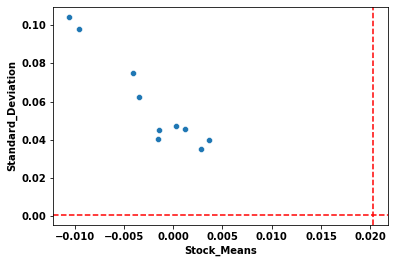

In [129]:
#plt.scatter(stock_sd, stock_means, edgecolors='r')
plot = sns.scatterplot(df['Stock_Means'], df['Standard_Deviation'])
plot.axvline(x=0.020257,linestyle='--', color = "red")
plot.axhline(y=0.000683,linestyle='--', color = "red")
plt.show()

### Inference: 

* As we can infer from the above plot, the stocks with high standard deviation have low stock_means and the stocks with low standard deviation have high stock means.

### Ques-2.5) Conclusion and Recommendations.

#### Conclusion and Recommendations:

* From the above findings it is clear that only a few stocks are giving positive returns, therefore we should focus on those only for investing purposes. 

* The stocks giving positive returns are Shree Cement, Infosys, Axis Bank and Indian Hotels. 

* One should only invest in the above mentioned stocks among the provided data of the stocks. 